### Sairam
### Machine Learning Nanodegree
### Capstone Project : Finding Fraud Payments



### Exploring Data
The data file is payments.csv and it contains payment transactions. The datafile contains 11 columns and isFraud is a target label. The isFraud indicates whether the payment transaction is fraud or not.


In [1]:
#Import required librariries 
import pandas as pd
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 

# Graphs display library
%matplotlib inline

# Load the payments dataset
start = time() # Get start time
data = pd.read_csv("data/payments.csv")
end = time() # Get end time
    
#  Calculate the data load time
print("Time to load the data file:{:.2f} seconds".format(end-start))

#Display first 10 records
display(data.head(10))

Time to load the data file:20.76 seconds


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### Implementation: Data Exploration
In this section, we will review the dataset. How many datarecords are identified as fraud transactions compare to the total count. 

- The total number of records, n_records
- The total number of columns, n_columns
- Total number of features, n_features
- Number of fraud transactions, n_fraud_count
- Number of fraud transactions percentage, n_fraud_percentage
- Zero amount transaction count is 16, all Zero amount transactions are categorized as Fraud
- Fraud count by transaction type 



In [2]:
### File Dimension
print("Data file contains {} rows and {} columns".format(data.shape[0], data.shape[1]))

### Number of records
n_records = len(data)

### Nunber of Columns
n_columns = len(data.columns)

###Number of features : Number of columns - 1 target column 
n_features = len(data.columns)-1

###Number of fraud payment records
n_fraud_count = len(data[data['isFraud'] == 1])

###Fraud percentantage 
n_fraud_percentage = (n_fraud_count/n_records)*100



print("Total Number of Records in the datafile:{}".format(n_records))
print("Total Number of features in the datafile:{}".format(n_features))
print("Total Number of fraud records in the datafile:{}".format(n_fraud_count))
print("Fraud pecentage compare to the total number of records:{:.4f}%".format(n_fraud_percentage))


###Number of records with zero amount
n_zero_amt_count = len(data[data['amount'] == 0])
n_amt_less_than_one = len(data[data['amount'] < 1])
n_amt_more_than_100K = len(data[data['amount'] > 100000])
n_amt_more_than_1M = len(data[data['amount'] > 1000000])
n_amt_more_than_1M_fraud = len(data[(data['amount'] > 1000000) & (data['isFraud'] == 1)])
n_amt_more_than_10M = len(data[data['amount'] > 10000000])
n_amt_more_than_10M_fraud = len(data[(data['amount'] > 10000000) & (data['isFraud'] == 1)])
display(data[data['amount'] == 0])
print("Number of records with zero amount:{}".format(n_zero_amt_count))
#print(data[data['amount'] < 1])
print("Number of records with amount less than One:{}".format(n_amt_less_than_one))

#print(data[data['amount'] > 10000000])
print("Number of records with amount more  than 100K:{}".format(n_amt_more_than_100K))
print("Number of records with amount more  than 1M:{}".format(n_amt_more_than_1M))
print("Number of fraud records with amount more  than 1 Million:{}".format(n_amt_more_than_1M_fraud))
print("Number of records with amount more  than 10 Millions:{}".format(n_amt_more_than_10M))
print("Number of fraud records with amount more  than 10 Millions:{}".format(n_amt_more_than_10M_fraud))
#Number of fraud transactions
#n_amt_more_than_10M_fraud= 


    

Data file contains 6362620 rows and 11 columns
Total Number of Records in the datafile:6362620
Total Number of features in the datafile:10
Total Number of fraud records in the datafile:8213
Fraud pecentage compare to the total number of records:0.1291%


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


Number of records with zero amount:16
Number of records with amount less than One:132
Number of records with amount more  than 100K:2837322
Number of records with amount more  than 1M:130626
Number of fraud records with amount more  than 1 Million:2706
Number of records with amount more  than 10 Millions:2443
Number of fraud records with amount more  than 10 Millions:0


# Data analysis
Zero Amount Records: The dataset contains sixteen (16) zero amount records and all Zero amount records are fraud records. The zero amount transaction type is CASH_OUT

More than 10Millions: The dataset cotnasin 2,443 records with amount more than 10 Millions. All these 10Milion amount records are genuine records and do not have fraud. Therefore, we can potentially drop these records from the analysis.

In [3]:
###Statistical Info
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
### Transaction Type Analysis
##Unique Type values
trans_types = data['type'].unique() ### this function is returning 5 unique values PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
print(trans_types)

###Record count by type
print("Record county transaction type")
print(data['type'].value_counts())

###Fraudulent Transaction count by type
for trans_type in trans_types: 
    fraud_count_by_type = len(data.loc[(data.type == trans_type) & (data.isFraud == 1) ])
    print("Number of fraudulent transactions: {} for transaction type: {}".format(fraud_count_by_type, trans_type))

df_transfer = data[data['type'] == 'TRANSFER']
display(df_transfer.head(10))
###Fraudulent transactions do exist in two types of records, TRANSFER and CASH_OUT. The remaining three type can be removed from the dataset.


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Record county transaction type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
Number of fraudulent transactions: 0 for transaction type: PAYMENT
Number of fraudulent transactions: 4097 for transaction type: TRANSFER
Number of fraudulent transactions: 4116 for transaction type: CASH_OUT
Number of fraudulent transactions: 0 for transaction type: DEBIT
Number of fraudulent transactions: 0 for transaction type: CASH_IN


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0


In [5]:
### IsFlaggedFraud Analysis

###Number of Transfer records flagged as fraud (isFlaggedFraud=1). The business Model flags as fraud if the TRANSFER amount is more than 200000
data_flagged = data.loc[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1) ]
n_transfer_isflagged = len(data_flagged)
print("Number of TRANSFER records Flagged as fraud: {}".format(n_transfer_isflagged))

print("Number of TRANSFER records which have amount more than 200000 and Flagged : {}".format(len(data.loc[(data.type == 'TRANSFER') & (data.amount > 200000) & (data.isFlaggedFraud == 1)])))
print("Number of TRANSFER records which have amount more than 200000 and Not Flagged: {}".format(len(data.loc[(data.type == 'TRANSFER') & (data.amount > 200000) & (data.isFlaggedFraud == 0)])))


display(data.loc[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 1)])

#display(data.loc[(data.type == 'TRANSFER') & (data.amount > 2000000)])
### All TRANSFER records with amount more than 200000 not Flagged. The fedature discription in not matching with the acutal data.
### It is not clear which condition is triggering the flagging. 
### Number of records are insignficance compare to the entire dataset. 
### How many customers initiated more than 1 and record is flaggged. 

print(data_flagged.nameOrig.value_counts())
print(data_flagged.nameDest.value_counts())
#data_flagged.nameOrig.isin(data_flagged.nameOrig)

Number of TRANSFER records Flagged as fraud: 16
Number of TRANSFER records which have amount more than 200000 and Flagged : 16
Number of TRANSFER records which have amount more than 200000 and Not Flagged: 409094


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


C1892216157    1
C728984460     1
C19004745      1
C1869569059    1
C786455622     1
C2140038573    1
C908544136     1
C992223106     1
C452586515     1
C724693370     1
C193696150     1
C1035541766    1
C689608084     1
C1100582606    1
C917414431     1
C1684585475    1
Name: nameOrig, dtype: int64
C1395467927    1
C1806199534    1
C1909486199    1
C1147517658    1
C484597480     1
C1770418982    1
C1100697970    1
C1082139865    1
C1392803603    1
C1308068787    1
C891140444     1
C1861208726    1
C1109166882    1
C1366804249    1
C661958277     1
C639921569     1
Name: nameDest, dtype: int64


## Featureset Analysis
- **Step:**	It maps a unit of time in the real world. In this case, step 1 represents First hour of transactions
- **Type:**	Transaction Type, CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- **Amount:**	Transaction Amount in local currency
- **nameOrig:**	The customer who initiated the transaction
- **oldbalanceOrg:**	The initial balance before the transaction
- **newbalanceOrig:**	The new balance after processing the transaction. 
- **nameDest:**	The customer who is the recipient of the payment
- **oldbalanceDest:**	The initial balance in the recipient account before the transaction. Note that there is not information for customers: that start with M (Merchants).
- **newbalanceDest:**	The new balance in the recipient account after processing the transaction. Note that there is not - information for customers that start with M (Merchants).
- **isFlaggedFraud:**	If a transfer amount is more than 200,000 then single transaction flags as illegal attempt. The business model flags the transaction as “illegal Attempt” for higher denominations. 



## Target Column/Label
- **isFraud:**	Value values are either 0 or 1.  The value 1 indicates that this transaction was created by the fraudulent agent inside the simulator

## Data Visualization

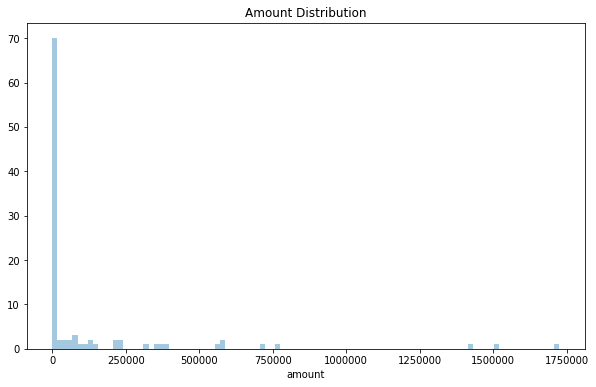

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sub_data = data[:100]
#print(sub_data)
#histogram
h = sns.distplot(sub_data['amount'], bins=100, kde=False)
h.set_title("Amount Distribution")
h.figure.set_size_inches(10,6)




C:\Users\VM7634\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


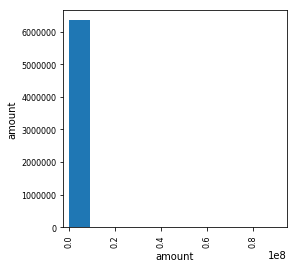

In [24]:
import matplotlib.pyplot as plt


# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
pd.scatter_matrix(data[['amount']], alpha = 0.3, figsize = (4,4));
#pd.scatter_matrix(data[['type']], alpha = 0.3, figsize = (4,4));



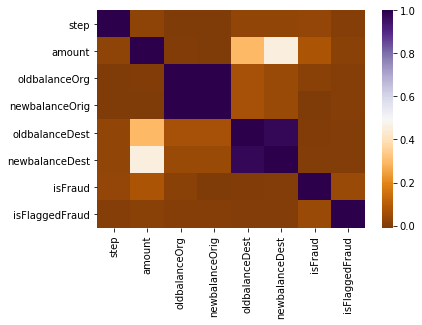

In [5]:
import seaborn as sns
# Calculate correlation between each pair of variable
corr_matrix=data.corr()
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

### Data Preprocessing/cleanup
In this section, I will drop the columns which are not brining value

In [6]:
### Retreive TRANSFER and Cashout records
df_transfer_cashout1 = data[(data['type'] == 'TRANSFER') | (data.type == 'CASH_OUT')].copy()
#display(df_transfer_cashout[:10])

###Convert type column from String to Integer. The type consists of two columns only. Therefore, we could convert into 0s and 1s
df_transfer_cashout1['c_type'] = df_transfer_cashout1['type'].map(lambda x:  1 if(x == 'TRANSFER') else 0)
display(df_transfer_cashout1[:10])
print("Before deleting the records with amount more than 10 Millions:{}".format(len(df_transfer_cashout1)))

###Delete rows which contains amount more than 10000000
df_transfer_cashout2 = df_transfer_cashout1[df_transfer_cashout1.amount < 10000000]
print("After deleting the records with amount more than 10 Millions:{}".format(len(df_transfer_cashout2)))

### New dataset after dropping the features, targetcolumn, isFlaggedFraud, type, and names
features_data = df_transfer_cashout2.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest', 'type'], axis = 1)
print("Feature data after dropping taget column and non-important columns ")
display(features_data[:10])

target_data = df_transfer_cashout2['isFraud']

display(target_data[:10])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,c_type
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,1
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,1


Before deleting the records with amount more than 10 Millions:2770409
After deleting the records with amount more than 10 Millions:2764759
Feature data after dropping taget column and non-important columns 


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,c_type
2,1,181.00,181.00,0.0,0.0,0.00,1
3,1,181.00,181.00,0.0,21182.0,0.00,0
15,1,229133.94,15325.00,0.0,5083.0,51513.44,0
19,1,215310.30,705.00,0.0,22425.0,0.00,1
24,1,311685.89,10835.00,0.0,6267.0,2719172.89,1
42,1,110414.71,26845.41,0.0,288800.0,2415.16,0
47,1,56953.90,1942.02,0.0,70253.0,64106.18,0
48,1,5346.89,0.00,0.0,652637.0,6453430.91,0
51,1,23261.30,20411.53,0.0,25742.0,0.00,0
58,1,62610.80,79114.00,16503.2,517.0,8383.29,1


2     1
3     1
15    0
19    0
24    0
42    0
47    0
48    0
51    0
58    0
Name: isFraud, dtype: int64

In [7]:
###Statistical Info
features_data.info()
display(features_data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764759 entries, 2 to 6362619
Data columns (total 7 columns):
step              int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
c_type            int64
dtypes: float64(5), int64(2)
memory usage: 168.7 MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,c_type
count,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06,2.764759e+06
mean,2.418526e+02,2.891746e+05,4.611017e+04,1.558167e+04,1.665541e+06,1.971901e+06,1.907584e-01
std,1.416932e+02,5.086847e+05,1.771353e+05,1.081043e+05,3.925636e+06,4.059531e+06,3.928991e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,8.280521e+04,0.000000e+00,0.000000e+00,1.279395e+05,3.266811e+05,0.000000e+00
50%,2.360000e+02,1.708607e+05,3.080000e+02,0.000000e+00,5.545978e+05,8.250948e+05,0.000000e+00
75%,3.330000e+02,3.055563e+05,3.100300e+04,0.000000e+00,1.728791e+06,2.108492e+06,0.000000e+00
max,7.430000e+02,9.998489e+06,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00


### Shuffle and Split data

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_data, 
                                                    target_data, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

C:\Users\VM7634\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 2211807 samples.
Testing set has 552952 samples.


### Naive Predictor
Assume that model has predicted all transactions as Fraud

In [9]:


total_records = len(features_data)
FP = np.sum(target_data) ###Fraud records
TP = total_records - FP #Total number of records minus Flase Positives
print("Total Records:",total_records)
print("True Postives:",TP)
print("False Postives:",FP)

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+FN)/(total_records)
recall =  TP/(TP+FN)
precision = TP/(TP+FP)

print("Accuracy:{:.4f}, Recall:{:.4f}, Precision:{:.4f}".format(accuracy, recall, precision))


# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
beta_square = beta**2
fscore = (1+ beta_square) * ((precision * recall)/
                            ((beta_square*precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Total Records: 2764759
True Postives: 2756833
False Postives: 7926
Accuracy:0.9971, Recall:1.0000, Precision:0.9971
Naive Predictor: [Accuracy score: 0.9971, F-score: 0.9977]


In [10]:
def calculate_predictions(classifier, parameters, score_type, X_train, y_train, X_test, y_test ):
    '''
    inputs:
       - classifier: the classifer model on which prediction is calculated
       - parameters: the hyper parameters applied to the Model
       - score_type: score that will be calculated 
       - X_train: features training set
       - y_train: fraud training set
       - X_test: features testing set
       - y_test: fraud testing set
    '''
    
    
    # Make an fbeta_score scoring object using make_scorer()
    scorer = make_scorer(score_type, beta=0.5)

    # Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
    grid_obj = GridSearchCV(classifier, parameters, scorer)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    print(best_clf)

    # Make predictions using the unoptimized and model
    predictions = (classifier.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Inside Fuction Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

# Logistic Regression

In [9]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 

# TODO: Initialize the classifier
#clf = DecisionTreeClassifier(random_state=40)
clf = LogisticRegression(random_state=40)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters = {'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[5,10, 15, 20], 'min_samples_leaf':[5,10,15]}
parameters = {'class_weight':['balanced', None], 'C':[0.001, 0.01, 0.1, 1.0, 10],  'max_iter':[100,200,500], \
               'fit_intercept':[True, False], 'intercept_scaling':[1,2,5,10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\VM7634\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=10, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=40, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Unoptimized model
------
Accuracy score on testing data: 0.9980
F-score on testing data: 0.6592

Optimized Model
------
Final accuracy score on the testing data: 0.9981
Final F-score on the testing data: 0.6858


# Decision Tree Classifier

In [16]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=40)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth':[1000], 'min_samples_split':[100], 'min_samples_leaf':[100], 'criterion':['entropy']}

# Execute model and determine the predeictions
calculate_predictions(clf, parameters, fbeta_score, X_train, y_train, X_test, y_test )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')
Inside Fuction Unoptimized model
------
Accuracy score on testing data: 0.9992
F-score on testing data: 0.8729

Optimized Model
------
Final accuracy score on the testing data: 0.9991
Final F-score on the testing data: 0.8886


#### Decision Tree Results:



|   Max Depth  | Min_Samples_Split | Min Samples leaf| Accuracy Score  | F-Score    |
| :----------: | :---------------: | :-------------: | :-------------: | :---------:|
|     100      |    1,000          |    100          |    0.9990       |   0.8916   |  
|    1,000     |    1,000          |    1,000        |    0.9986       |   0.8270   |
|    1,000     |    1,000          |    100          |    0.9991       |   0.8916   |
|   10,000     |      100          |    100          |    0.9991       |   0.8830   | 
|   10,000     |    1,000          |    1,000        |    0.9990       |   0.8916   |
|    1,000     |    1,000          |    100          |    0.9990       |   0.8957   | Entropy

### Random Forest

In [24]:
#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 

# Initialize the classifier
clf = RandomForestClassifier(random_state=40)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators':[30],'max_depth':[250], 'min_samples_split':[100], 'min_samples_leaf':[100], 'criterion':['entropy']}

# Execute model and determine the predeictions
start = time() # Get start time
calculate_predictions(clf, parameters, fbeta_score, X_train, y_train, X_test, y_test )
end = time() # Get end time
# Calculate the training time
print("Execution Time:{}".format(end-start))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=250, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=40, verbose=0, warm_start=False)
Inside Fuction Unoptimized model
------
Accuracy score on testing data: 0.9993
F-score on testing data: 0.9273

Optimized Model
------
Final accuracy score on the testing data: 0.9990
Final F-score on the testing data: 0.9046
Execution Time:672.8504042625427


#### Random Forest Model  Results:



|   Max Depth  | Min_Samples_Split | Min Samples leaf| Accuracy Score  | F-Score   |Method | n_estimators
| :----------: | :---------------: | :-------------: | :-------------: |:---------:|:-----:|:---------:|
|     100      |    1,000          |    100          |    0.9990       |  0.8916   |  
|    1,000     |    1,000          |    1,000        |    0.9986       |  0.8270   |
|    1,000     |    1,000          |    100          |    0.9991       |  0.8916   |
|   10,000     |      100          |    100          |    0.9991       |  0.8830   | 
|   10,000     |    1,000          |    1,000        |    0.9990       |  0.8916   |
|    1,000     |    1,000          |    100          |    0.9990       |  0.8957   | Entropy|
|    1,000     |    1,000          |    100          |    0.9990       |  0.9037   | Entropy| 100    |
|    1,000     |    1,000          |    100          |    0.9990       |  0.9071   | Entropy|  50|
|    1,000     |    1,000          |    100          |    0.9990       |  0.9039   | Entropy|  40  |
|    1,000     |    1,000          |    100          |    0.9990       |  0.9046   | Entropy|  30  |
|      500     |    1,000          |    100          |    0.9990       |  0.9046   | Entropy|  30  |
|      250     |    1,000          |    100          |    0.9990       |  0.9046   | Entropy|  30  |

# K-Nearest neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score 
from sklearn.metrics import accuracy_score 

# Initialize the classifier
clf = KNeighborsClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_neighbors':[20]}

# Execute model and determine the predeictions
start = time() # Get start time
calculate_predictions(clf, parameters, fbeta_score, X_train, y_train, X_test, y_test )
end = time() # Get end time
# Calculate the training time
print("Execution Time:{}".format(end-start))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
Inside Fuction Unoptimized model
------
Accuracy score on testing data: 0.9989
F-score on testing data: 0.8522

Optimized Model
------
Final accuracy score on the testing data: 0.9989
Final F-score on the testing data: 0.8485
Execution Time:1210.3519999980927


## K-Nearest Neighbor Results
Auto
10
Accuracy score on testing data: 0.9989
F-score on testing data: 0.8522
    
20
Accuracy score on testing data: 0.9989
F-score on testing data: 0.8522
    
25
Accuracy score on testing data: 0.9989
F-score on testing data: 0.8522

50
Final accuracy score on the testing data: 0.9988
Final F-score on the testing data: 0.8295
    
kd_tree
25
Final accuracy score on the testing data: 0.9988
Final F-score on the testing data: 0.8387
    
ball_tree
25
Accuracy score on testing data: 0.9989
F-score on testing data: 0.8522
    

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Initialize the classifier
clf = SVC()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'kernel':['linear'], 'C':[1], 'gamma':[1]}

# Execute model and determine the predeictions
start = time() # Get start time
calculate_predictions(clf, parameters, fbeta_score, X_train, y_train, X_test, y_test )
end = time() # Get end time
# Calculate the training time
print("Execution Time:{}".format(end-start))